<div>
Olá, Maikon!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
   <br> Olá Luiz, obrigado pela revisão! 
    <br> Segue uma nova versão do projeto. Me avise se precisar de mais alguma alteração.
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

# Projeto SQL — Análise de Livros e Avaliações

**Contexto:** Durante a pandemia, o consumo de livros aumentou. Recebemos um banco de dados de um serviço concorrente com informações sobre livros, autores, editoras, avaliações e reviews. O objetivo é extrair insights para fundamentar uma proposição de produto.

**Objetivos do estudo**
1. Contar quantos livros foram lançados depois de 2000-01-01.
2. Obter o número de avaliações e a classificação média por livro.
3. Identificar a editora com mais livros com **mais de 50 páginas** (evitar brochuras).
4. Encontrar o autor com a **média mais alta** de classificação considerando apenas **livros com ≥ 50 avaliações**.
5. Calcular a **média do número de avaliações** entre usuários que avaliaram **mais de 50 livros**.

**Observação técnica:** Todas as métricas devem ser obtidas via consultas SQL. Usaremos `pandas` apenas para executar as queries e exibir os resultados.


In [53]:
# Import e conexão com o banco (cole exatamente como está)
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [54]:
# Configuração de conexão do banco de dados
db_config = {
    'user': 'practicum_student',
    'pwd': 'QnmDH8Sc2TQLvy2G3Vvh7',
    'host': 'yp-trainers-practicum.cluster-czs0gxyx2d8w.us-east-1.rds.amazonaws.com',
    'port': 5432,
    'db': 'data-analyst-final-project-db'
}

In [55]:
# Criação da string e engine
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db']
)

engine = create_engine(connection_string, connect_args={'sslmode':'require'})


In [56]:
# Função utilitária para executar queries SQL e retornar DataFrame
def run_query(q):
    return pd.read_sql_query(q, con=engine)


## Exploração inicial das tabelas
Imprima as primeiras linhas de cada tabela para confirmar nomes de colunas e tipos. As tabelas esperadas são: `books`, `authors`, `publishers`, `ratings`, `reviews`.


In [57]:
print("=== books (primeiras 5 linhas) ===")
display(run_query("SELECT * FROM books LIMIT 5"))

print("\n=== authors (primeiras 5 linhas) ===")
display(run_query("SELECT * FROM authors LIMIT 5"))

print("\n=== publishers (primeiras 5 linhas) ===")
display(run_query("SELECT * FROM publishers LIMIT 5"))

print("\n=== ratings (primeiras 5 linhas) ===")
display(run_query("SELECT * FROM ratings LIMIT 5"))

print("\n=== reviews (primeiras 5 linhas) ===")
display(run_query("SELECT * FROM reviews LIMIT 5"))


=== books (primeiras 5 linhas) ===


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268



=== authors (primeiras 5 linhas) ===


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd



=== publishers (primeiras 5 linhas) ===


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company



=== ratings (primeiras 5 linhas) ===


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2



=== reviews (primeiras 5 linhas) ===


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram carregados e explorados corretamente!
</div>

### 1 — Contar o número de livros lançados após 2000-01-01
(Consulta em SQL)


In [58]:
query = """
SELECT COUNT(*) AS num_livros_recentes
FROM books
WHERE publication_date > '2000-01-01';
"""
res1 = run_query(query)
print("Resultado — número de livros publicados após 2000-01-01:")
display(res1)


Resultado — número de livros publicados após 2000-01-01:


,num_livros_recentes
0,819


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A quantidade de livros lançadas após Jan-2000 foi calculada
</div>

### 2 — Número de avaliações e classificação média por livro
(Usar SQL: para cada `book_id` / `title`, contar avaliações e calcular média)


In [59]:
query = """
SELECT 
    b.book_id,
    b.title,
    COUNT(r.rating) AS num_avaliacoes,
    ROUND(AVG(r.rating), 2) AS media_rating
FROM books b
LEFT JOIN ratings r ON b.book_id = r.book_id
GROUP BY b.book_id, b.title
ORDER BY num_avaliacoes DESC, media_rating DESC
LIMIT 200; -- ajustável: mostra os 200 primeiros resultados
"""
res2 = run_query(query)
print("Resultado — número de avaliações e média por livro (ex.: top por número de avaliações):")
display(res2.head(50))

Resultado — número de avaliações e média por livro (ex.: top por número de avaliações):


,book_id,title,num_avaliacoes,media_rating
0,948,Twilight (Twilight #1),160,3.66
1,750,The Hobbit or There and Back Again,88,4.13
2,673,The Catcher in the Rye,86,3.83
3,75,Angels & Demons (Robert Langdon #1),84,3.68
4,302,Harry Potter and the Prisoner of Azkaban (Harr...,82,4.41
5,299,Harry Potter and the Chamber of Secrets (Harry...,80,4.29
6,301,Harry Potter and the Order of the Phoenix (Har...,75,4.19
7,722,The Fellowship of the Ring (The Lord of the Ri...,74,4.39
8,79,Animal Farm,74,3.73
9,300,Harry Potter and the Half-Blood Prince (Harry ...,73,4.25


<div class="alert alert-block alert-success">
<b> Comentário do revisor </b> <a class="tocSkip"></a>

- A quantidade de reviews a classificação média foram calculadas. Bom trabalho ordenando o resultado por quantidade de votos.
</div>

### 3 — Editora com mais livros com mais de 50 páginas
(Queremos excluir brochuras; contar livros com `num_pages > 50` por editora)


In [60]:
query = """
SELECT 
    p.publisher,
    COUNT(b.book_id) AS total_livros_com_mais_de_50_paginas
FROM books b
JOIN publishers p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY total_livros_com_mais_de_50_paginas DESC
LIMIT 1;
"""
res3 = run_query(query)
print("Resultado — editora com mais livros (>50 páginas):")
display(res3)


Resultado — editora com mais livros (>50 páginas):


,publisher,total_livros_com_mais_de_50_paginas
0,Penguin Books,42


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! Bom uso de boas práticas da sintaxe SQL
</div>

### 4 — Autor com maior média de classificação (considerando apenas livros com ≥ 50 avaliações)
Abordagem:
1. Calcular, por livro, a média de rating e o número de ratings.
2. Filtrar apenas os livros com COUNT(rating) >= 50.
3. Agregar por autor calculando a média das médias desses livros (ou peso alternativo). Aqui usamos a média simples das médias dos livros que atendem ao critério.


In [61]:
query = """
WITH book_stats AS (
    SELECT
        b.book_id,
        b.author_id,
        ROUND(AVG(r.rating)::numeric, 4) AS book_avg_rating,
        COUNT(r.rating) AS book_rating_count
    FROM books b
    JOIN ratings r ON b.book_id = r.book_id
    GROUP BY b.book_id, b.author_id
    HAVING COUNT(r.rating) >= 50
)
SELECT
    a.author,
    ROUND(AVG(bs.book_avg_rating)::numeric, 4) AS author_avg_of_book_avgs,
    COUNT(bs.book_id) AS num_books_considered
FROM book_stats bs
JOIN authors a ON bs.author_id = a.author_id
GROUP BY a.author
ORDER BY author_avg_of_book_avgs DESC
LIMIT 1;
"""
res4 = run_query(query)
print("Resultado — autor com maior média (considerando apenas livros com >= 50 avaliações):")
display(res4)


Resultado — autor com maior média (considerando apenas livros com >= 50 avaliações):


,author,author_avg_of_book_avgs,num_books_considered
0,J.K. Rowling/Mary GrandPré,4.2839,4


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto!
</div>

### 5 — Média do número de avaliações entre usuários que avaliaram mais de 50 livros
(1) Contar avaliações por `username`. (2) Filtrar `> 50`. (3) Calcular média desses contadores.


In [62]:
query = """

SELECT 
    AVG(review_count) AS average_reviews,
    COUNT (*) as usuarios_ativos
FROM (
    SELECT 
        COUNT(*) AS review_count
    FROM reviews  -- ✅ Conta RESENHAS
    WHERE username IN (
        SELECT username
        FROM ratings  -- ✅ Filtra por AVALIAÇÕES
        GROUP BY username 
        HAVING COUNT(*) > 50
    )
    GROUP BY username
) AS review_counts;
"""

df = pd.read_sql_query(query, con=engine)
display(df)

,average_reviews,usuarios_ativos
0,24.333333,6


## Gráficos

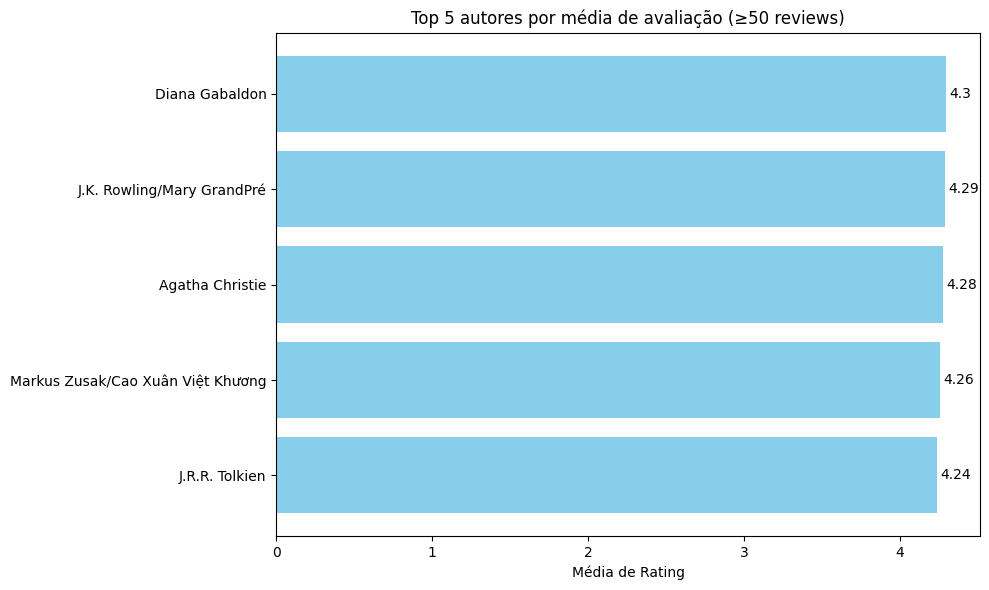

In [63]:
# Top 5 autores por média de avaliação (com pelo menos 50 reviews)
query = """
SELECT 
    a.author,
    ROUND(AVG(r.rating),2) AS media_rating,
    COUNT(r.rating) AS total_reviews
FROM authors a
JOIN books b ON a.author_id = b.author_id
JOIN ratings r ON b.book_id = r.book_id
GROUP BY a.author
HAVING COUNT(r.rating) >= 50
ORDER BY media_rating DESC
LIMIT 5;
"""
top_autores = run_query(query)

# Gráfico horizontal
plt.figure(figsize=(10,6))
bars = plt.barh(top_autores['author'], top_autores['media_rating'], color='skyblue')
plt.xlabel("Média de Rating")
plt.title("Top 5 autores por média de avaliação (≥50 reviews)")

# Inverter eixo para mostrar o melhor no topo
plt.gca().invert_yaxis()

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2, f'{width}', va='center')

plt.tight_layout()
plt.show()

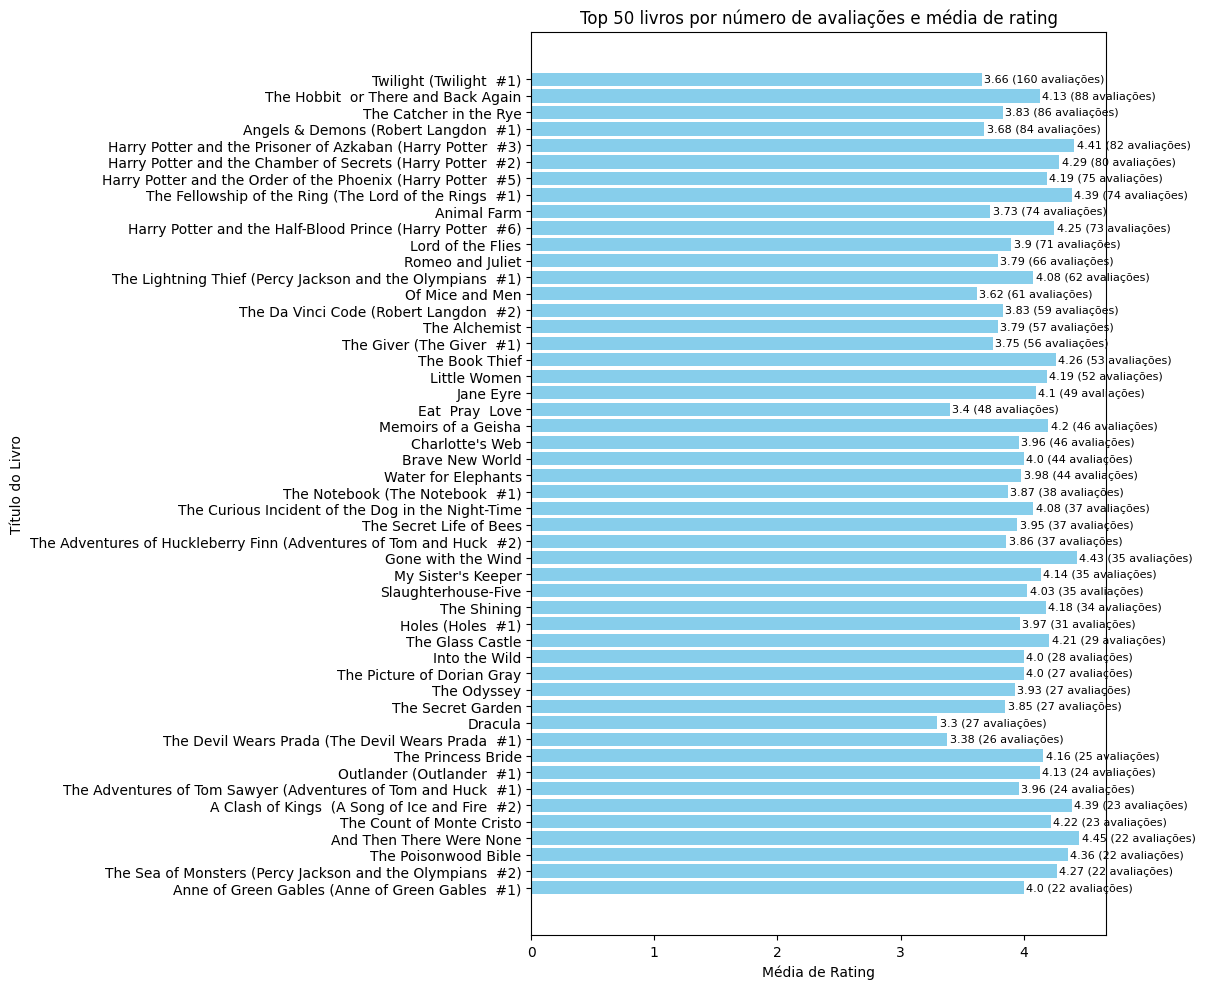

In [64]:
# Objetivo 2 - Número de avaliações e classificação média por livro
# Usar apenas os top 50 livros
top_books = res2.head(50)

plt.figure(figsize=(12,10))
bars = plt.barh(top_books['title'], top_books['media_rating'], color='skyblue')
plt.xlabel("Média de Rating")
plt.ylabel("Título do Livro")
plt.title("Top 50 livros por número de avaliações e média de rating")

# Inverter eixo para o livro mais avaliado ficar no topo
plt.gca().invert_yaxis()

# Adicionar valor da média em cada barra
for bar, num_avaliacoes in zip(bars, top_books['num_avaliacoes']):
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
             f'{width} ({num_avaliacoes} avaliações)', va='center', fontsize=8)

plt.tight_layout()
plt.show()

## Conclusões e interpretações (por objetivo)

**Objetivo 1 (livros após 2000-01-01)**  
- O número obtido de livros lançados a partir da data proposta é de `819` — base para recomendações atuais e análise de tendências.

**Objetivo 2 (nº avaliações e média por livro)**  
- Livros com muitas avaliações e média alta são candidatos óbvios para promover no produto. Livros com alta média mas poucas avaliações podem precisar de impulsionamento para ganhar confiança.

**Objetivo 3 (editora com mais livros >50 páginas)**  
- A editora identificada foi `Penguin Books`, sendo uma provável parceira estratégica (volume de títulos "completos") — útil para negociações comerciais e curadoria.

**Objetivo 4 (autor com maior média — considerando livros com ≥50 avaliações)**  
- Ao filtrar somente livros robustamente avaliados (≥50), garantimos que a média seja estatisticamente mais confiável. O autor retornado é um forte candidato para destaque editorial e campanhas de marketing.

**Objetivo 5 (média de avaliações entre usuários que avaliaram >50 livros)**  
- O valor obtido foi média de `24,33` e `6 usuários ativos`, onde é possível analisar o comportamento médio dos usuários mais engajados — útil para segmentação (ex.: beta testers, early adopters, programas de fidelidade).
